

Extraemos los datos



In [1]:
pip install pandas

In [2]:
pip install kaggle

In [3]:
from google.colab import files
files.upload()  # subir el archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrsbentezconcha","key":"1803aefc5414583d80ac97197ddb8271"}'}

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  # Ruta donde colocaste el archivo kaggle.json

In [5]:
import shutil
from kaggle.api.kaggle_api_extended import KaggleApi

# Crear una instancia de la API de Kaggle y autenticar
api = KaggleApi()

# Descargar el conjunto de datos Wine Reviews de Kaggle
dataset_name = "zynicide/wine-reviews"  # Nombre correcto del dataset
download_path = "/content/wine-reviews.zip"  # Ruta de descarga del archivo ZIP

# Descargar el conjunto de datos
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

# Mover los archivos a la carpeta '/content/wine-reviews'
destination_path = "/content/wine-reviews"
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Mover los archivos descargados a la carpeta de destino
shutil.move(download_path, destination_path)

print(f"Archivos movidos a: {destination_path}")


Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
Archivos movidos a: /content/wine-reviews


In [6]:
# Ruta al archivo CSV que se descomprimió
csv_file_path = '/content/wine-reviews/winemag-data-130k-v2.csv'

se cargan los dos df

In [7]:
import pandas as pd

In [8]:
df1 = pd.read_csv("/content/wine-reviews/wine-reviews.zip/winemag-data_first150k.csv")
df2 = pd.read_csv("/content/wine-reviews/wine-reviews.zip/winemag-data-130k-v2.csv")

# 1. Exploración y Limpieza de Datos (EDA & ETL)

# con df1: winemag-data_first150k.csv

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


**Breve descripción de las variables**

**country**: El país de origen del vino.

**description**: Una descripción del vino, donde se detallan las características como sabor, aroma y notas de cata.

**designation**: Nombre o designación específica del vino, a menudo relacionado con la bodega o la subregión.

**points**: La puntuación otorgada al vino por los catadores, generalmente en una escala de 1 a 100.

**price**: El precio del vino, en la moneda local del país de origen.

**province**: La provincia o estado dentro del país donde se produce el vino.

**region_1**: Una región más específica dentro de la provincia, indicando la zona exacta de producción.

**region_2**: Una subregión aún más específica dentro de region_1, aunque a menudo está vacía.

**variety**: El tipo de uva (variedad) utilizada para el vino.

**winery**: El nombre de la bodega o productor del vino.

In [ ]:
# Mostrar las primeras filas
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
df2.shape

(129971, 14)

In [10]:
#  valores faltantes
df1.isna().sum()

,0
Unnamed: 0,0
country,5
description,0
designation,45735
points,0
price,13695
province,5
region_1,25060
region_2,89977
variety,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

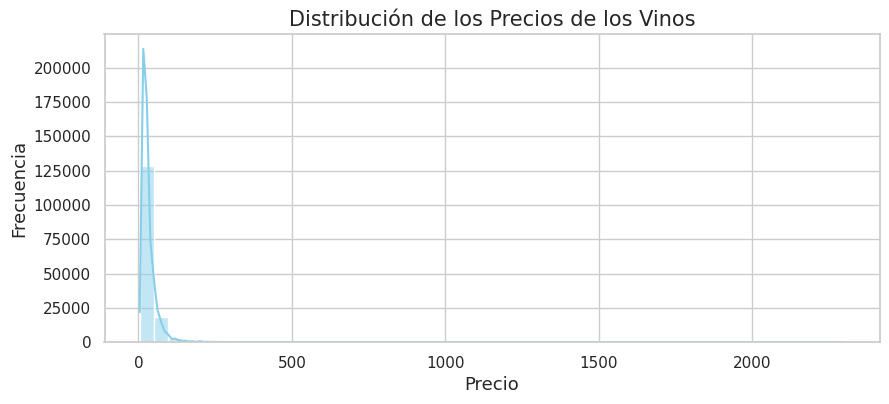

In [28]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de distribución para la columna 'price'
plt.figure(figsize=(10, 4))
sns.histplot(df1['price'], bins=50, kde=True, color='skyblue')

# Título y etiquetas
plt.title('Distribución de los Precios de los Vinos', fontsize=15)
plt.xlabel('Precio', fontsize=13)
plt.ylabel('Frecuencia', fontsize=13)

# Mostrar el gráfico
plt.show()


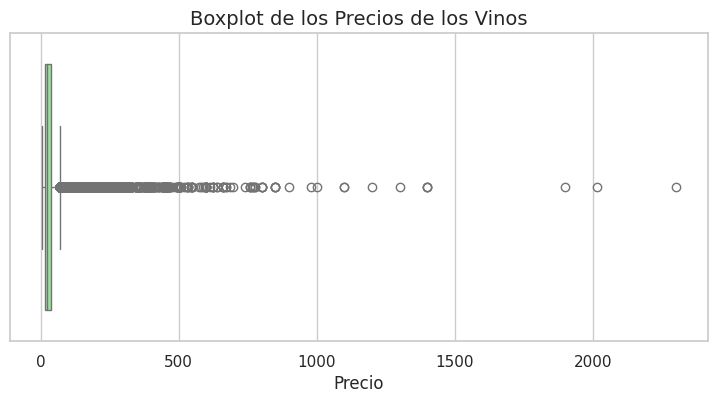

In [26]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el boxplot para la columna 'price'
plt.figure(figsize=(9, 4))
sns.boxplot(x=df1['price'], color='lightgreen')

# Título y etiquetas
plt.title('Boxplot de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=12)

# Mostrar el gráfico
plt.show()

price 13695 son nulos y los reemplazamos por la mediana

In [13]:
df1['price'].fillna(df1['price'].median(), inplace=True)

<ipython-input-13-d04b3684edfc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['price'].fillna(df1['price'].median(), inplace=True)


imputando por mediana el grafico no tiene mayor cambio

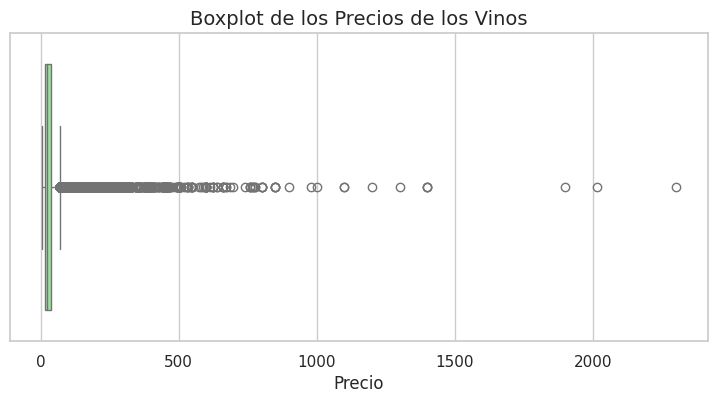

In [23]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el boxplot para la columna 'price'
plt.figure(figsize=(9, 4))
sns.boxplot(x=df1['price'], color='lightgreen')

# Título y etiquetas
plt.title('Boxplot de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=12)

# Mostrar el gráfico
plt.show()

eliminar paises y provincias faltantes, son 5 nulos asi es que es una buena decisión

In [15]:
# Eliminar las filas con valores nulos en 'country' y 'province'
df1 = df1.dropna(subset=['country', 'province'])

el resto de los nulos son: designation: 45735, region_1: 25060, region_2: 89977 (muchos nulos, dificlmente se utilicen más adelante, de todas formas se mantienen sin alterar)

como tenemos la variable country imputada con pocos nulos, se considera que es totalmente operacionalizable, mientras que designation, region_1 y region_2, aun no sabemos si las ocuparemos más adelante. decisión: se mantienen en esta etapa hasta nuevo aviso.  

verificar duplicados

In [16]:
# Verificar si existen filas duplicadas
duplicados = df1[df1.duplicated()]

# Mostrar los primeros duplicados (si los hay)
print(duplicados.head())

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, variety, winery]
Index: []


In [ ]:
# Contar cuántas filas duplicadas hay
num_duplicados = df1.duplicated().sum()
print(f'Número de duplicados: {num_duplicados}')

Número de duplicados: 0


In [ ]:
#  valores faltantes
df1.isna().sum()

,0
Unnamed: 0,0
country,0
description,0
designation,45735
points,0
price,0
province,0
region_1,25055
region_2,89972
variety,0


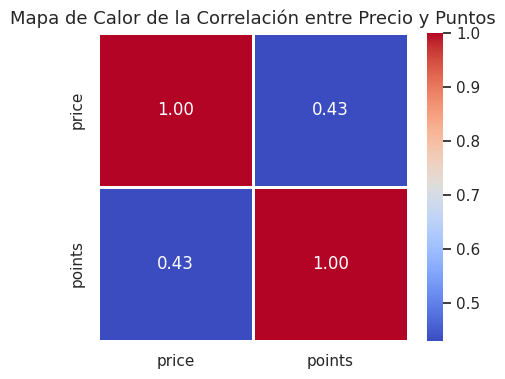

In [25]:
# Seleccionar las columnas de interés
correlation_data = df1[['price', 'points']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear el mapa de calor de la correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Título
plt.title('Mapa de Calor de la Correlación entre Precio y Puntos', fontsize=13)

# Mostrar el gráfico
plt.show()


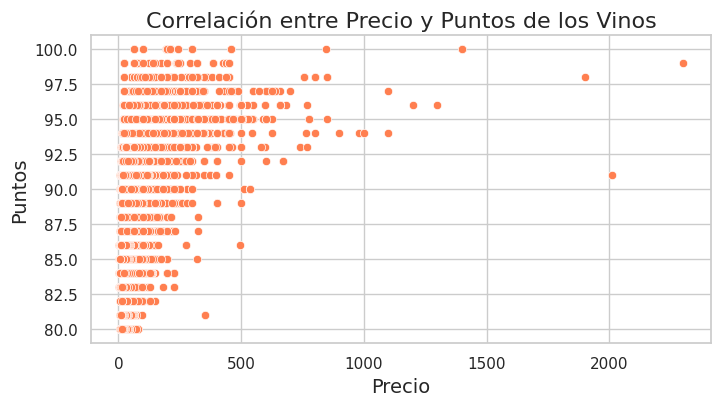

In [18]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión para correlación entre 'price' y 'points'
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df1['price'], y=df1['points'], color='coral')

# Título y etiquetas
plt.title('Correlación entre Precio y Puntos de los Vinos', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Puntos', fontsize=14)

# Mostrar el gráfico
plt.show()


hay una alta concentracion de buenos puntajes entre los vinos que son economicos hasta los 500 USD. son muy pocos los vinos que superan los 1000 USD y que por lo demás tienen de más de 90

# con df2: winemag-data-130k-v2.csv

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


"taster_name", "taster_twitter_handle" y "title" son variables adicionales (object) que tiene esta df2 en comparación a df1.

**Breve descripción de las variables adicionales**

"taster_name": nombre del catador o experto en vinos que realizó la evaluación o puntuación del vino.

"taster_twitter_handle": el nombre de usuario que lo identifica en twitter. permite asociar a los catadores con sus cuentas en Twitter.

"title": nombre del vino o etiqueta que ha sido evaluado por un catador

datos faltantes

In [ ]:
#  valores faltantes
df2.isna().sum()

,0
Unnamed: 0,0
country,63
description,0
designation,37465
points,0
price,8996
province,63
region_1,21247
region_2,79460
taster_name,26244


imputados faltanes

In [ ]:
# Eliminar las filas con valores nulos en 'country' y 'province'
df2 = df2.dropna(subset=['country', 'province'])

In [ ]:
# Eliminar las filas con valores nulos en variety
df2 = df2.dropna(subset=['variety'])

price 8996 faltantes , lo reemplzamos por la mediana

In [ ]:
df2['price'].fillna(df2['price'].median(), inplace=True)

<ipython-input-19-129ccf0a5d08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['price'].fillna(df2['price'].median(), inplace=True)


In [ ]:
#  valores faltantes
df2.isna().sum()

,0
Unnamed: 0,0
country,0
description,0
designation,37453
points,0
price,0
province,0
region_1,21183
region_2,79396
taster_name,26243


por el momento nos quedamos con los faltantes de "region_1", "region_2", "taster_name", "taster_twitter_handle", "designation". No sabemos aun si son variables que necesitaremos modelar más adelante así es que las dejamos con los faltantes.

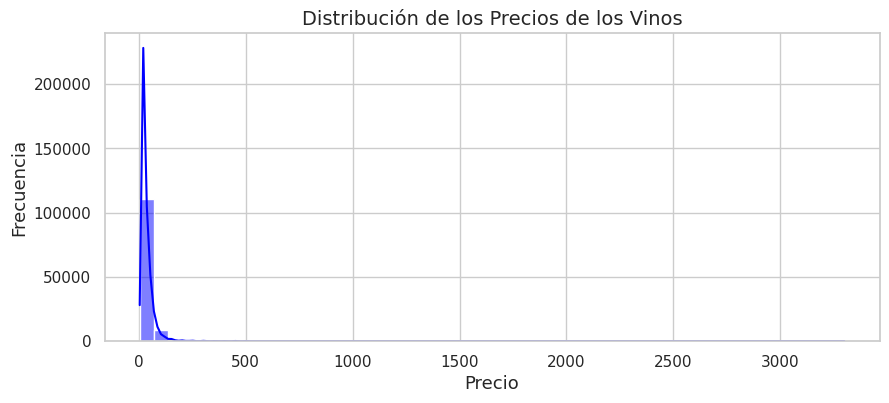

In [29]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de distribución para la columna 'price'
plt.figure(figsize=(10, 4))
sns.histplot(df2['price'], bins=50, kde=True, color='blue')

# Título y etiquetas
plt.title('Distribución de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=13)
plt.ylabel('Frecuencia', fontsize=13)

# Mostrar el gráfico
plt.show()

minimos y maximos

In [30]:
# Obtener el precio mínimo y máximo
min_price = df2['price'].min()
max_price = df2['price'].max()

# Imprimir los valores
print(f'Precio mínimo: {min_price}')
print(f'Precio máximo: {max_price}')

Precio mínimo: 4.0
Precio máximo: 3300.0


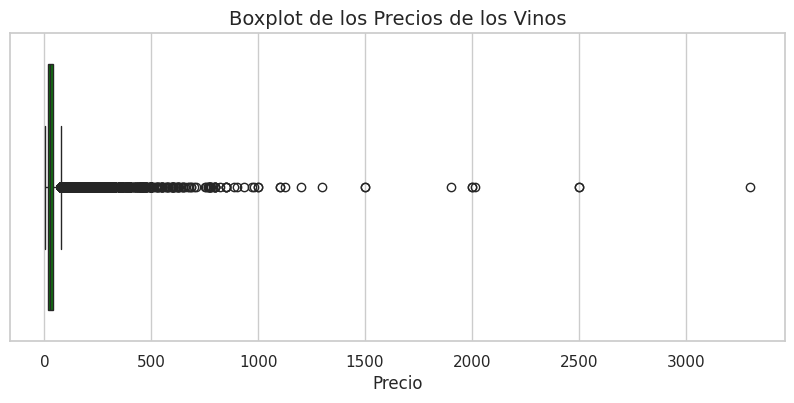

In [32]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el boxplot para la columna 'price'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2['price'], color='green')

# Título y etiquetas
plt.title('Boxplot de los Precios de los Vinos', fontsize=14)
plt.xlabel('Precio', fontsize=12)

# Mostrar el gráfico
plt.show()

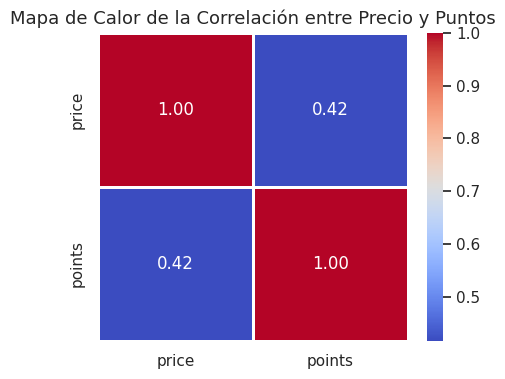

In [33]:
# Seleccionar las columnas de interés
correlation_data = df2[['price', 'points']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear el mapa de calor de la correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

# Título
plt.title('Mapa de Calor de la Correlación entre Precio y Puntos', fontsize=13)

# Mostrar el gráfico
plt.show()

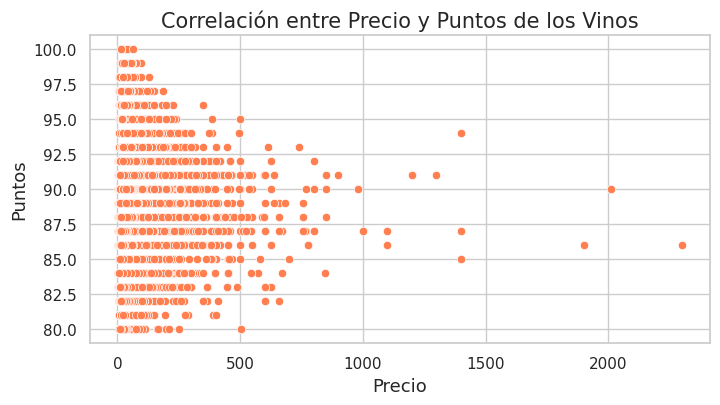

In [36]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión para correlación entre 'price' y 'points'
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df1['price'], y=df2['points'], color='coral')

# Título y etiquetas
plt.title('Correlación entre Precio y Puntos de los Vinos', fontsize=15)
plt.xlabel('Precio', fontsize=13)
plt.ylabel('Puntos', fontsize=13)

# Mostrar el gráfico
plt.show()


no por mas caro tiene mas puntos. los datos se concentran entre los mas economicos hasta casi los 500 USD y con puntajes entre los 85 y 92.5 por los catadores. son muy pocos los vinos que superan los 1000 USD y estos, no se concentran en los mejores puntajes.

# 2. Análisis de Precios y Factores de Calidad

Analizar la relación entre el precio y la puntuación de los
vinos.


In [ ]:
correlation = df1[['price', 'points']].corr()
print(correlation)

           price    points
price   1.000000  0.429703
points  0.429703  1.000000


In [ ]:
correlation = df2[['price', 'points']].corr()
print(correlation)


           price    points
price   1.000000  0.399266
points  0.399266  1.000000


correlación entre el precio y la puntuación es moderadamente positiva. Esto significa que, en general, a medida que aumenta el precio de un vino, también tiende a aumentar su puntuación. pero como vimos anteriormente *el precio no determina una alta puntuacion de los catadores*, de hehco lo contrario, los vinos más economicos o que llegan a un tope de 500 USD son los mejores calificados por los catadores.

Identificar si existen regiones o variedades de uva con
mejor relación calidad-precio.


Calcular la relación calidad-precio

In [59]:
# Crear una nueva columna para la relación calidad-precio
df2['quality_price_ratio'] = df2['points'] / df2['price']

In [60]:
df2["quality_price_ratio"].unique()

array([       nan, 6.21428571, 6.69230769, ..., 0.69117647, 0.56287425,
       0.39574468])

In [61]:
# Obtener el valor máximo y mínimo de 'quality_price_ratio'
max_quality_price = df2['quality_price_ratio'].max()
min_quality_price = df2['quality_price_ratio'].min()

print("Valor máximo de la relación calidad-precio:", max_quality_price)
print("Valor mínimo de la relación calidad-precio:", min_quality_price)

Valor máximo de la relación calidad-precio: 21.5
Valor mínimo de la relación calidad-precio: 0.02666666666666667


Valores altos: Buena calidad a bajo precio, una opción atractiva para los consumidores.

Valores bajos: Alta calidad pero caro, o vino de baja calidad a alto precio, lo que podría ser menos atractivo.

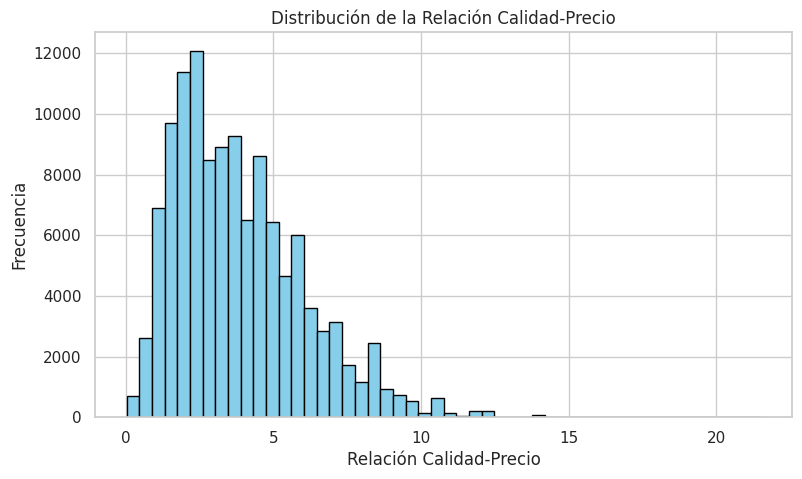

In [42]:
# Graficar el histograma de la relación calidad-precio
plt.figure(figsize=(9, 5))
plt.hist(df2['quality_price_ratio'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Relación Calidad-Precio')
plt.xlabel('Relación Calidad-Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Agrupar por región y variedad

dado que regiones tienen muchos valores perdidos utilicé paises

PAISES

In [ ]:
# Agrupar por región y calcular la media de la relación calidad-precio
region_quality_price = df2.groupby('country')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores regiones por relación calidad-precio
print(region_quality_price.head())


country
Ukraine                   9.671551
Romania                   8.873497
India                     7.129465
Bulgaria                  7.006666
Bosnia and Herzegovina    6.935897
Name: quality_price_ratio, dtype: float64


también se hizo el ejercicio de hacerlo con region no imputada y region imputada para verificar si podía ser presentable

REGIONES (Region_1)

In [ ]:
# Agrupar por región y calcular la media de la relación calidad-precio
region_quality_price = df2.groupby('region_1')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores regiones por relación calidad-precio
print(region_quality_price.head())

region_1
Grave del Friuli                           12.000000
Australia-New Zealand                      10.375000
Tierra de Castilla                         10.210006
Vino de la Tierra Contraviesa Alpujarra     9.666667
Côtes du Frontonnais                        9.444444
Name: quality_price_ratio, dtype: float64


REGIONES (Region_1 imputada)

In [44]:
# Eliminar las filas con datos faltantes en la columna 'region_1'
df2= df2.dropna(subset=['region_1'])

In [45]:
# Agrupar por región y calcular la media de la relación calidad-precio
region_quality_price = df2.groupby('region_1')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores regiones por relación calidad-precio
print(region_quality_price.head())

region_1
Grave del Friuli                           12.000000
Australia-New Zealand                      10.375000
Tierra de Castilla                         10.210006
Vino de la Tierra Contraviesa Alpujarra     9.666667
Falerio dei Colli Ascolani                  9.444444
Name: quality_price_ratio, dtype: float64


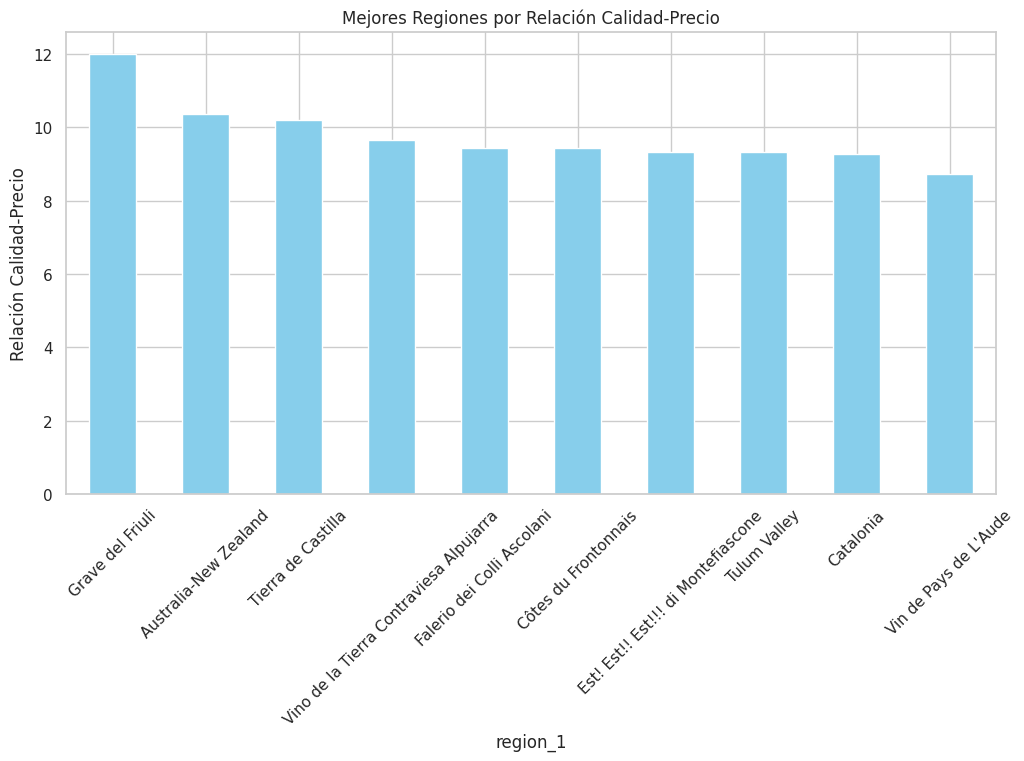

In [49]:
# Gráfico de barras de las mejores regiones por relación calidad-precio
plt.figure(figsize=(12, 6))
region_quality_price.head(10).plot(kind='bar', color='skyblue')
plt.title('Mejores Regiones por Relación Calidad-Precio')
plt.xlabel('region_1')
plt.ylabel('Relación Calidad-Precio')
plt.xticks(rotation=45)
plt.show()


VARIEDAD

El tipo de uva (variedad) utilizada para el vino

In [58]:
# Agrupar por variedad y calcular la media de la relación calidad-precio
variety_quality_price = df2.groupby('variety')['quality_price_ratio'].mean().sort_values(ascending=False)

# Mostrar las mejores variedades por relación calidad-precio
print(variety_quality_price.head())


variety
Macabeo-Moscatel              10.625000
Johannisberg Riesling         10.592560
Shiraz-Tempranillo             9.914286
Tinto Velasco                  9.444444
Merseguera-Sauvignon Blanc     9.444444
Name: quality_price_ratio, dtype: float64


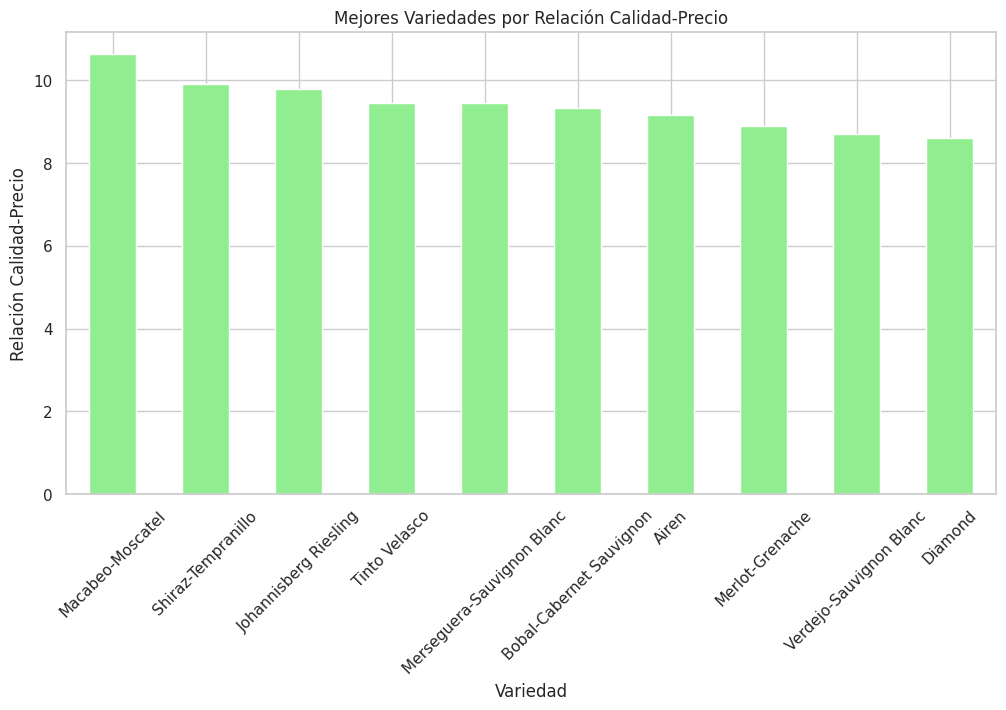

In [ ]:
# Gráfico de barras de las mejores variedades por relación calidad-precio
plt.figure(figsize=(12, 6))
variety_quality_price.head(10).plot(kind='bar', color='lightgreen')
plt.title('Mejores Variedades por Relación Calidad-Precio')
plt.xlabel('Variedad')
plt.ylabel('Relación Calidad-Precio')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Calcular percentiles para los precios
q1 = df2['price'].quantile(0.25)
q2 = df2['price'].quantile(0.50)  # Mediana
q3 = df2['price'].quantile(0.75)

# Recodificar los precios en categorías
def categorize_price(price):
    if price <= q1:
        return 'Bajo'
    elif price <= q2:
        return 'Medio'
    elif price <= q3:
        return 'Alto'
    else:
        return 'Muy alto'

# Aplicar la recodificación
df2['price_category'] = df2['price'].apply(categorize_price)

# Ver el resultado
print(df2[['price', 'price_category']].head())

   price price_category
0    NaN       Muy alto
1   15.0           Bajo
2   14.0           Bajo
3   13.0           Bajo
4   65.0       Muy alto


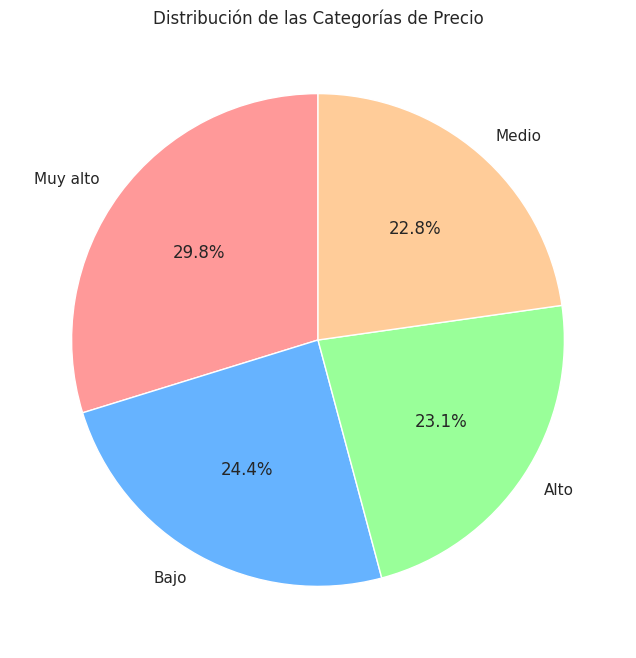

In [ ]:
# Contar la cantidad de vinos en cada categoría de precio
price_category_counts = df2['price_category'].value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
price_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])  # Colores personalizados
plt.title('Distribución de las Categorías de Precio')
plt.ylabel('')  # Eliminar el label de y-axis
plt.show()

Aplicar técnicas de regresión para predecir el precio de un
vino según sus características.


MODELO DE REGRESION LINEAL PARA EL PRECIO

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [51]:
# Obtener el valor máximo y mínimo de 'quality_price_ratio'
max_quality_price = df2['price'].max()
min_quality_price = df2['price'].min()

print("Valor máximo de price:", max_quality_price)
print("Valor mínimo de price:", min_quality_price)

Valor máximo de price: 3300.0
Valor mínimo de price: 4.0


genrar el modelo de regresión: su variable dependiente y variables independientes

In [52]:
# Seleccionar características para el modelo
features = ['points', 'country', 'region_1', 'variety', 'quality_price_ratio']
target = 'price'

# Definir las variables independientes (X) y la dependiente (y)
X = df2[features]
y = df2[target]

ya habiamos tratado los nulos imputando para region_1 , country, point y variety

trasformamos a binario las categoricas

In [53]:
X = pd.get_dummies(X, columns=['country', 'region_1', 'variety'], drop_first=True)

escalar variable point y nueva variable ratio calidad/precio

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['points','quality_price_ratio']] = scaler.fit_transform(X[['points', 'quality_price_ratio']])

División de los datos en conjunto de entrenamiento y prueba

In [63]:
# Dividir los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento del modelo

In [64]:
from sklearn.linear_model import LinearRegression

In [62]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

 Evaluar el modelo

In [65]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

NOTA PARA EVALUAR REGRESION LINEAL:
En el modelo de regresión lineal no se usan métricas de clasificación como precisión (accuracy), classification_report, etc (r accuracy_score y classification_report).

Para evaluar un modelo de regresión lineal, utilizaremos el Error Cuadrático Medio (MSE) o el Coeficiente de Determinación R².

Regresion lineal es para predicciones numéricas continuas.

Regresión logística es para clasificar observaciones en categorías.

In [ ]:
# Evaluar el modelo usando el error cuadrático medio (MSE) o R²
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'R²: {r2}')


Error cuadrático medio (MSE): 809.0295956945195
R²: 0.42049617415637996


con independientes features = ['points', 'country', 'region_1', 'variety', 'quality_price_ratio']

Error cuadrático medio (MSE): 809.0295956945195
R²: 0.42049617415637996





con una independiente features = ['points']

Error cuadrático medio (MSE): 1161.0904372706812
R²: 0.16831676600015943


con una independiente features = ['region_1']

Error cuadrático medio (MSE): 1072.324048244855
R²: 0.2318996835108963

con una independiente features = ['region_1', 'variety']

Error cuadrático medio (MSE): 1039.5311876347828
R²: 0.2553890444502567

CONCLUSIÓN REGRESIÓN LINEAL PRECIO:

Error Cuadrático Medio (MSE): 809.02....mide la diferencia promedio entre las predicciones del modelo y los valores reales (con el error elevado al cuadrado).

MSE: 809.02 podría ser considerado relativamente alto, dependiendo de la magnitud de los precios de los vinos en tu conjunto de datos. Si los precios de los vinos son muy altos (por ejemplo, de miles de dólares), un MSE de 953 podría ser aceptable, pero si los precios son bajos, podría significar que el modelo está cometiendo errores significativos.




R² de 0.42 indica que el modelo está explicando aproximadamente el 42% de la variabilidad en los precios de los vinos. El modelo no está capturando bien la relación entre las características y el precio del vino (al igual que correlación)

poca variabilidad significa que no está logrando predecir con precisión o capturar las diferencias que existen en los precios de los vinos en función de las características

En los gráficos que has generado, como el scatterplot entre "precio" y "puntos", podemos ver que no necesariamente los vinos más caros tienen los mejores puntajes. Muchos vinos de bajo precio también tienen buenas puntuaciones. Esto sugiere que el precio no es un factor determinante exclusivo de la calidad (puntajes), y otras variables pueden estar influyendo, como la región, la variedad de uva o incluso el marketing de la bodega. La baja correlación entre precio y puntos también contribuye a la falta de explicación clara del modelo.


Conclusión

El modelo probablemente no esté capturando todos los factores que influyen en los precios, y es por eso que no puede explicar bien la variabilidad en los precios. La baja correlación entre precio y puntos, junto con la presencia de otros factores no observados, refuerzan esta idea. Deberías explorar la inclusión de más variables o considerar modelos más complejos (como técnicas de machine learning) que puedan manejar de manera más efectiva la complejidad de los datos.

# 3.- Análisis de Sentimiento en Reseñas (NLP)

Limpieza de datos: eliminación de stopwords, stemming,
lematización.


In [66]:
pip install spacy

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [68]:
pip install nltk

In [69]:
# Descargar las stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [70]:
import re # se usa para trabajar con expresiones regulares, lo que permite buscar, extraer, dividir, reemplazar y validar patrones en cadenas de texto.
import string

In [71]:
df2['description']

,description
0,"Aromas include tropical fruit, broom, brimston..."
2,"Tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this..."
5,Blackberry and raspberry aromas show a typical...
...,...
129965,"While it's rich, this beautiful dry wine also ..."
129967,Citation is given as much as a decade of bottl...
129968,Well-drained gravel soil gives this wine its c...
129969,"A dry style of Pinot Gris, this is crisp with ..."


pasar las mayusculas a minusculas para facilitar el análisis

In [72]:
# Preprocesamiento del texto
def preprocesamiento_texto(text):

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar números, puntuación y caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # busca todo lo que no sea una letra del alfabeto o un espacio en blanco

    # Eliminar espacios adicionales
    text = text.strip()   # elimina cualquier espacio en blanco extra al principio o al final del texto

    return text

# Aplicar el preprocesamiento a la columna 'description'
df2['clean_description'] = df2['description'].apply(preprocesamiento_texto)


In [73]:
df2['clean_description']

,clean_description
0,aromas include tropical fruit broom brimstone ...
2,tart and snappy the flavors of lime flesh and ...
3,pineapple rind lemon pith and orange blossom s...
4,much like the regular bottling from this come...
5,blackberry and raspberry aromas show a typical...
...,...
129965,while its rich this beautiful dry wine also of...
129967,citation is given as much as a decade of bottl...
129968,welldrained gravel soil gives this wine its cr...
129969,a dry style of pinot gris this is crisp with s...


Tokenización

unidades mínimas de significado o tokens

In [74]:
import nltk    # Natural Language Toolkit
nltk.download('punkt')          # modelo de tokenización
nltk.download('punkt_tab')      # Es un recurso adicional que se menciona en algunos contextos, pero no es esencial en todos los casos.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [75]:
# Tokenización de las reseñas
from nltk.tokenize import word_tokenize

df2['tokens'] = df2['clean_description'].apply(lambda x: word_tokenize(x, language='english'))

In [76]:
df2['tokens']

,tokens
0,"[aromas, include, tropical, fruit, broom, brim..."
2,"[tart, and, snappy, the, flavors, of, lime, fl..."
3,"[pineapple, rind, lemon, pith, and, orange, bl..."
4,"[much, like, the, regular, bottling, from, thi..."
5,"[blackberry, and, raspberry, aromas, show, a, ..."
...,...
129965,"[while, its, rich, this, beautiful, dry, wine,..."
129967,"[citation, is, given, as, much, as, a, decade,..."
129968,"[welldrained, gravel, soil, gives, this, wine,..."
129969,"[a, dry, style, of, pinot, gris, this, is, cri..."


Eliminación de stop words

In [77]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# Obtener las stop words en inglés
stop_words = set(stopwords.words('english'))

# Eliminar stop words de las reseñas tokenizadas
df2['tokens_no_stopwords'] = df2['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words]) # filtra las palabras de las reseñas tokenizadas

In [79]:
df2['tokens_no_stopwords']

,tokens_no_stopwords
0,"[aromas, include, tropical, fruit, broom, brim..."
2,"[tart, snappy, flavors, lime, flesh, rind, dom..."
3,"[pineapple, rind, lemon, pith, orange, blossom..."
4,"[much, like, regular, bottling, comes, across,..."
5,"[blackberry, raspberry, aromas, show, typical,..."
...,...
129965,"[rich, beautiful, dry, wine, also, offers, con..."
129967,"[citation, given, much, decade, bottle, age, p..."
129968,"[welldrained, gravel, soil, gives, wine, crisp..."
129969,"[dry, style, pinot, gris, crisp, acidity, also..."


In [80]:
# Obtener el conjunto de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Listar todas las stopwords
print(stop_words)


{'shan', 'the', 'but', "should've", 'hadn', "you'd", 'them', 'so', 've', "needn't", 'are', "isn't", 'he', 'own', 'both', 'were', 'been', 'by', 't', 'him', 'just', 'where', 'during', "doesn't", "you'll", 'you', 'theirs', 'after', 'under', 'being', 'haven', 'into', 'while', 'down', 'does', 'why', "aren't", 'here', "wasn't", 'about', 'be', 'over', 'll', 'and', 'me', 'its', 'off', 'should', 'itself', 'do', 'don', "you're", 'once', 'had', "it's", 'above', 'nor', 'all', 'it', 'doing', "haven't", 'wasn', 'too', 'each', 'isn', 'their', 'through', 'further', "shouldn't", 'his', 'as', 'whom', 'm', 'on', 'from', 'shouldn', 'same', "hasn't", 'very', "hadn't", 'against', 'for', 'with', 'some', "didn't", 'a', 'at', "couldn't", 'couldn', 'not', 's', 'this', "don't", 'what', 'can', 'when', 'now', 'ourselves', 'themselves', "mightn't", 'your', 'or', 'y', 'our', 'again', 'such', 'd', 'weren', 'i', 'ma', "weren't", 'if', 'wouldn', 'having', 'ain', 'then', 'aren', 'doesn', 'herself', 'yours', 'needn', "sh

Lematización

normalización de palabras en el que se reduce una palabra a su lema o raíz

In [81]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [82]:
lemmatizer = WordNetLemmatizer()   # clase proporcionada por NLTK que se basa en WordNet, una gran base de datos léxica del idioma inglés.

# Lematizar las palabras
df2['lemmatized'] = df2['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

Cada fila contiene una lista de palabras representadas como un list en lugar de una cadena de texto.

In [83]:
df2['lemmatized']

,lemmatized
0,"[aroma, include, tropical, fruit, broom, brims..."
2,"[tart, snappy, flavor, lime, flesh, rind, domi..."
3,"[pineapple, rind, lemon, pith, orange, blossom..."
4,"[much, like, regular, bottling, come, across, ..."
5,"[blackberry, raspberry, aroma, show, typical, ..."
...,...
129965,"[rich, beautiful, dry, wine, also, offer, cons..."
129967,"[citation, given, much, decade, bottle, age, p..."
129968,"[welldrained, gravel, soil, give, wine, crisp,..."
129969,"[dry, style, pinot, gris, crisp, acidity, also..."


El stemming y la lematización son dos técnicas de procesamiento de texto utilizadas para reducir las palabras a su raíz o forma base

Vectorización de texto

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
pip install scikit-learn

In [86]:
# Unir las palabras lematizadas en una sola cadena de texto
df2['description_text'] = df2['lemmatized'].apply(lambda x: ' '.join(x)) # texto en formato de cadenas (strings) en lugar de listas de tokens

# Vectorizar las reseñas usando TF-IDF
vectorizer = TfidfVectorizer(max_features=13000)  # Puedes ajustar el número de características
X = vectorizer.fit_transform(df2['description_text'])

donde cada fila representa una reseña y cada columna una palabra en el vocabulario. El parámetro max_features=13000 limita el número de características (palabras) que se usarán, manteniendo solo las 13,000 palabras más frecuentes o importantes en el corpus.

La idea de TF-IDF es medir no sólo cuánto aparece una palabra en un documento, sino también qué tan frecuente es esa palabra en todo el corpus.

In [87]:
X.shape

(108724, 13000)

In [88]:
print (X)

  (0, 511)	0.09506308721529627
  (0, 5705)	0.27667150233053234
  (0, 11895)	0.20617104045486243
  (0, 4652)	0.08544603811644086
  (0, 1410)	0.3235023827334235
  (0, 1366)	0.370171324009915
  (0, 3435)	0.33480918533902976
  (0, 5400)	0.15309502674446593
  (0, 8127)	0.10038237987647272
  (0, 5920)	0.2774691846798853
  (0, 8040)	0.2893086708980242
  (0, 4021)	0.27852821655113646
  (0, 7846)	0.21410158591655382
  (0, 436)	0.14602736683568526
  (0, 2120)	0.15711767872240068
  (0, 9801)	0.22863465490455476
  (0, 271)	0.1785804260354416
  (0, 1376)	0.22821102013014355
  (0, 74)	0.10466495408084733
  (1, 74)	0.10390947849584216
  (1, 11423)	0.17695306412952044
  (1, 10545)	0.28680434858652976
  (1, 4343)	0.15077968994045182
  (1, 6478)	0.18987551732048613
  (1, 4362)	0.2843876118513436
  :	:
  (108722, 2646)	0.24124497276118712
  (108722, 5152)	0.3266294044960557
  (108722, 10587)	0.24212903740290487
  (108722, 7585)	0.24050156644793724
  (108722, 282)	0.21155494028541674
  (108722, 166)	0.215

ver las palabras que corresponden a las columnas de la matriz TF-IDF

In [92]:
vocab = vectorizer.get_feature_names_out()
print(vocab[1])  # Ver la palabra que corresponde a la columna xxxx

abacela


Entrenamiento de un modelo de NLP

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Análisis de frecuencia de palabras más comunes en vinos bien puntuados vs. mal puntuados.


In [96]:
min_points = df2['points'].min()
max_points = df2['points'].max()

print(f'Mínimo: {min_points}, Máximo: {max_points}')

Mínimo: 80, Máximo: 100


In [98]:
# Definir el umbral para los vinos bien puntuados y mal puntuados
umbral_puntuacion = 90

# Filtrar los vinos bien puntuados (puntuación > 90) y mal puntuados (puntuación <= 90)
vinos_bien_puntuados = df2[df2['points'] > umbral_puntuacion]
vinos_mal_puntuados = df2[df2['points'] <= umbral_puntuacion]

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

(Bag of words)

In [105]:
# Vectorizador para obtener las palabras más frecuentes
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Puedes ajustar el número de características

# Vectorizar las reseñas de vinos bien puntuados y mal puntuados
X_bien = vectorizer.fit_transform(vinos_bien_puntuados['description_text'])
X_mal = vectorizer.transform(vinos_mal_puntuados['description_text'])

# Obtener las palabras del vocabulario (las 50 más frecuentes)
vocab = vectorizer.get_feature_names_out()

# Obtener las frecuencias de palabras para cada grupo (bien puntuados y mal puntuados)
freq_bien = X_bien.sum(axis=0).A1  # Sumar las frecuencias de las palabras en vinos bien puntuados
freq_mal = X_mal.sum(axis=0).A1  # Sumar las frecuencias de las palabras en vinos mal puntuados


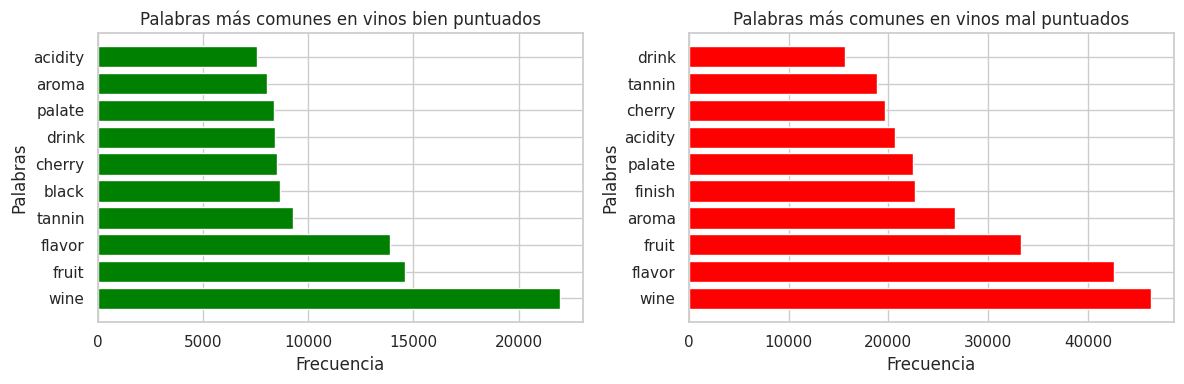

In [108]:
# Ordenar las palabras por su frecuencia para cada grupo
orden_bien = np.argsort(freq_bien)[::-1]  # Ordenar en orden descendente para vinos bien puntuados
orden_mal = np.argsort(freq_mal)[::-1]  # Ordenar en orden descendente para vinos mal puntuados

# Tomar las 10 palabras más frecuentes de cada grupo
top_10_bien = vocab[orden_bien][:10]
top_10_mal = vocab[orden_mal][:10]

# Tomar las frecuencias de esas palabras
top_10_bien_freq = freq_bien[orden_bien][:10]
top_10_mal_freq = freq_mal[orden_mal][:10]

# Graficar las palabras más frecuentes en ambos grupos
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Vinos bien puntuados
ax[0].barh(top_10_bien, top_10_bien_freq, color='green')
ax[0].set_title("Palabras más comunes en vinos bien puntuados")
ax[0].set_xlabel("Frecuencia")
ax[0].set_ylabel("Palabras")

# Vinos mal puntuados
ax[1].barh(top_10_mal, top_10_mal_freq, color='red')
ax[1].set_title("Palabras más comunes en vinos mal puntuados")
ax[1].set_xlabel("Frecuencia")
ax[1].set_ylabel("Palabras")

plt.tight_layout()
plt.show()


En ambos parece ser lo que más observan los catadores es vino, frutal, y sabor, que es lo mas mencionado en la descipción. Sobre las diferencias, en mal rankeados le sigue aroma, final y paladar. En bien puntuados, tanino, negro y cherry (cereza o fresa).

En buenos puntuados, es menos frecuente la palabra acidez mientras que se hace más frecuente en mal calificados.

# Construcción de un modelo de análisis de sentimiento para clasificar reseñas como positivas o negativas.


In [109]:
# Etiquetar las reseñas como positivas o negativas basándonos en la puntuación
umbral_puntuacion = 90
df2['sentiment'] = df2['points'].apply(lambda x: 1 if x > umbral_puntuacion else 0)

# Mostrar la distribución de las clases
print(df2['sentiment'].value_counts())


sentiment
0    79915
1    28809
Name: count, dtype: int64


1: Reseña positiva (puntuación > 90).

0: Reseña negativa (puntuación <= 90).

Preprocesamiento del texto

In [110]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X = df2['description_text']  # Las reseñas lematizadas
y = df2['sentiment']  # Las etiquetas de sentimiento

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Vectorización del texto con TF-IDF: convertir las reseñas de texto en vectores numéricos usando TF-IDF.

In [111]:
# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Ajustar y transformar el conjunto de entrenamiento
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transformar el conjunto de prueba
X_test_tfidf = vectorizer.transform(X_test)

Construcción y entrenamiento del modelo

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15981
           1       0.76      0.60      0.67      5764

    accuracy                           0.84     21745
   macro avg       0.81      0.77      0.79     21745
weighted avg       0.84      0.84      0.84     21745

[[14887  1094]
 [ 2290  3474]]


**Precisión**: Cuántas de las predicciones positivas fueron realmente positivas.

Para 0: el 87% de las veces que el modelo predijo una reseña como negativa, efectivamente era negativa.

Para 1: El 76% de las veces que el modelo predijo una reseña como positiva, efectivamente era positiva.



**Recall**: Cuántas de las verdaderas etiquetas positivas fueron correctamente identificadas.

Para 0: El modelo identificó correctamente el 93% de todas las reseñas negativas

Para 1: El modelo identificó correctamente solo el 60% de todas las reseñas positivas.

F1-score: Promedio ponderado de la precisión y recall.

La exactitud global del modelo es 0.84, lo que indica que el 84% de las predicciones fueron correctas.

Evaluación del modelo

# Visualización de resultados con nubes de palabras.

In [113]:
pip install wordcloud

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nubes de palabras basadas únicamente en las reseñas de vino clasificadas como positivas o negativas según su puntuación

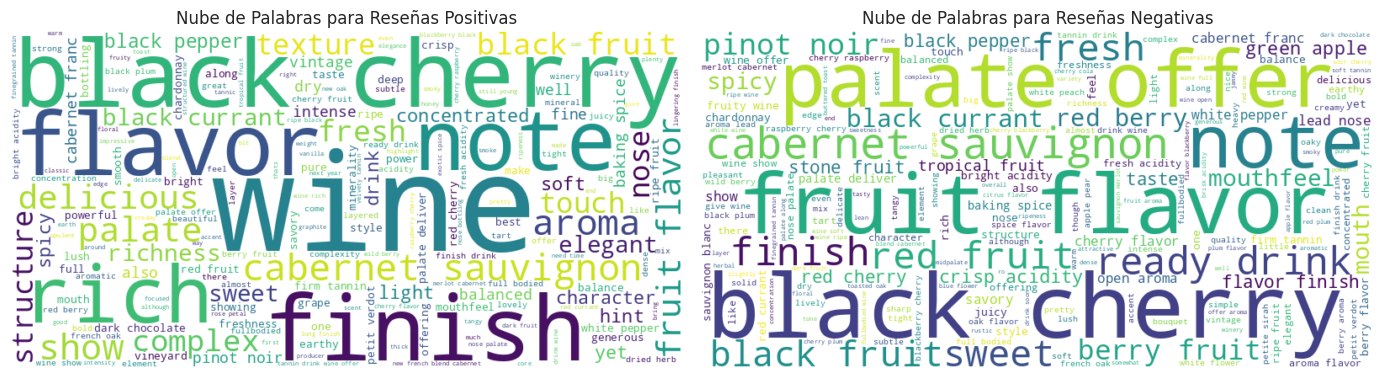

In [115]:
# Obtener las reseñas de vinos positivos y negativos
positive_reviews = df2[df2['sentiment'] == 1]['description_text']
negative_reviews = df2[df2['sentiment'] == 0]['description_text']

# Crear una sola cadena de texto para cada clase
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Crear las nubes de palabras
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(negative_text)

# Mostrar las nubes de palabras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mostrar la nube de palabras para reseñas positivas
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Nube de Palabras para Reseñas Positivas')

# Mostrar la nube de palabras para reseñas negativas
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nube de Palabras para Reseñas Negativas')

plt.tight_layout()
plt.show()

En lugar de basarse en la clasificación de las reseñas según la puntuación, podrías basar la nube de palabras en las características más importantes según el modelo de regresión logística.

El modelo de regresión logística tiene coeficientes que indican la importancia de cada palabra para predecir la clase (positiva o negativa).

Las palabras con coeficientes positivos son las que el modelo asocia más con las reseñas positivas, y las palabras con coeficientes negativos son las que asocia más con las reseñas negativas.

Para eso vamos a:

Obtener los coeficientes del modelo de regresión logística.

Asociar estos coeficientes con las palabras correspondientes en el vectorizador TF-IDF.

Visualizar las palabras con los coeficientes más altos (positivos para reseñas positivas y negativos para reseñas negativas).

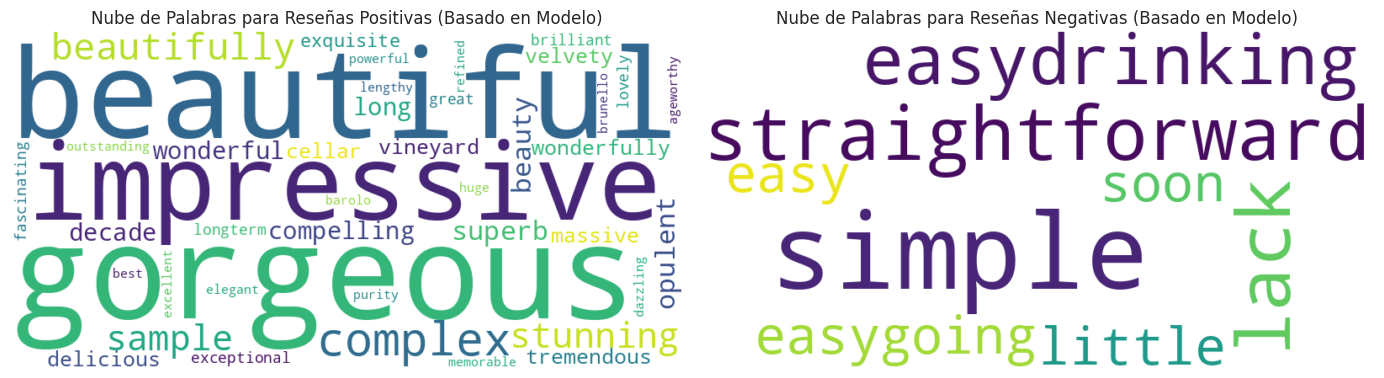

In [116]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo de regresión logística
coefficients = model.coef_.flatten()

# Obtener las palabras del vocabulario
vocab = vectorizer.get_feature_names_out()

# Crear un diccionario con las palabras y sus respectivos coeficientes
word_coefficients = dict(zip(vocab, coefficients))

# Ordenar las palabras según el valor absoluto de los coeficientes (más importantes)
sorted_word_coefficients = sorted(word_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Seleccionar las top 50 palabras con los coeficientes más altos (positivos y negativos)
top_words = sorted_word_coefficients[:50]

# Dividir las palabras en positivas y negativas basadas en los coeficientes
positive_words = [word for word, coef in top_words if coef > 0]
negative_words = [word for word, coef in top_words if coef < 0]

# Crear las nubes de palabras
positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(negative_text)

# Mostrar las nubes de palabras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Mostrar la nube de palabras para reseñas positivas
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Nube de Palabras para Reseñas Positivas (Basado en Modelo)')

# Mostrar la nube de palabras para reseñas negativas
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nube de Palabras para Reseñas Negativas (Basado en Modelo)')

plt.tight_layout()
plt.show()


Coeficientes del modelo: Usamos los coeficientes del modelo de regresión logística (model.coef_) que indican la relación entre las palabras y las clases (positiva o negativa). Un coeficiente alto (positivo) indica que la palabra está asociada con reseñas positivas, y un coeficiente negativo indica lo contrario.

Top palabras: Seleccionamos las 50 palabras más relevantes según su coeficiente (positivo o negativo). Estas son las que el modelo considera más importantes para predecir la clasificación.

Nubes de palabras: Generamos nubes de palabras usando las palabras positivas (coeficientes positivos) y palabras negativas (coeficientes negativos).

muestra cómo el modelo "ve" las palabras más relevantes para las clases positivas y negativas.